In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-solution-file/solution.csv


In [36]:
import pandas  as pd
import numpy   as np
import xgboost as xgb


In [37]:
train_data = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv',index_col=0)
test_data  = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv',index_col=0)

In [38]:
X_train = train_data.select_dtypes(include=['number']).copy()
X_train = X_train.drop(['SalePrice'], axis=1)
y_train = train_data["SalePrice"]
X_test  = test_data.select_dtypes(include=['number']).copy()

In [39]:
regressor=xgb.XGBRegressor(eval_metric='rmsle')

In [40]:
# lr = [0.1, 0.001,0.0001]
# opt_list = ['adam','rmsprop']

# for var1 in lr_list:
#     for var2 in opt_list:
#         model(lrvar1, optimizer=var2)

In [41]:
from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"max_depth":    [4, 5, 6],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015]}

# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=5).fit(X_train, y_train)

print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'learning_rate': 0.015, 'max_depth': 5, 'n_estimators': 600}


In [62]:
regressor=xgb.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],
                           eval_metric='rmsle')

regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmsle', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.015, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=600, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [63]:
predictions = regressor.predict(X_test)

In [64]:
import pickle
with open('xgboost_feature_full.pk1','wb') as f:
    pickle.dump(regressor, f)

In [65]:
with open('xgboost_feature_full.pk1','rb') as f:
     loaded_model = pickle.load(f)

In [66]:
result = regressor.predict(unseen_data)
result

array([187909.58, 167449.64,  73261.14], dtype=float32)

In [67]:
unseen_data = [[70,10516,1515],[313,215245,5642],[21,1300,334]]

In [68]:
solution   = pd.read_csv('../input/house-prices-advanced-regression-solution-file/solution.csv')
y_true     = solution["SalePrice"]

from sklearn.metrics import mean_squared_log_error
RMSLE = np.sqrt( mean_squared_log_error(y_true, predictions) )
print("The score is %.5f" % RMSLE )

The score is 0.26363


In [69]:
output = pd.DataFrame({"Id":test_data.index, "SalePrice":predictions})
output.to_csv('submission.csv', index=False)

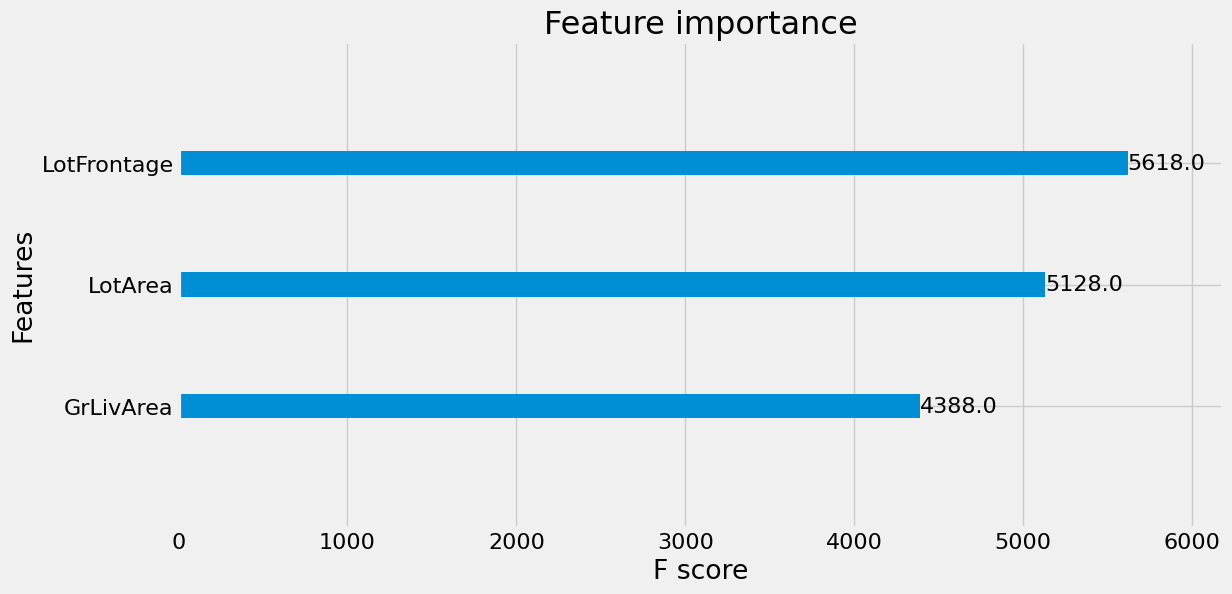

In [70]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(12,6))
plot_importance(regressor, max_num_features=8, ax=ax)
plt.show();

In [71]:
def RSLE(y_hat,y):
    return np.sqrt((np.log1p(y_hat) - np.log1p(y))**2)

print("The RMSLE score is %.3f" % RSLE( 400,1000) )
print("The RMSLE score is %.3f" % RSLE(1600,1000) )

The RMSLE score is 0.915
The RMSLE score is 0.470


In [72]:
y_train

Id
1       208500
2       181500
3       223500
4       140000
5       250000
         ...  
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1460, dtype: int64

In [73]:
cols = ['LotFrontage','LotArea','GrLivArea']
X_train = X_train[cols]
X_test = X_test[cols]

In [74]:
X_train[cols].agg(['mean','max','min'])

,LotFrontage,LotArea,GrLivArea
mean,70.049958,10516.828082,1515.463699
max,313.000000,215245.000000,5642.000000
min,21.000000,1300.000000,334.000000


In [75]:
X_test.head()

,LotFrontage,LotArea,GrLivArea
Id,,,
1461,80.0,11622,896
1462,81.0,14267,1329
1463,74.0,13830,1629
1464,78.0,9978,1604
1465,43.0,5005,1280


In [76]:
X_train.head()

,LotFrontage,LotArea,GrLivArea
Id,,,
1,65.0,8450,1710
2,80.0,9600,1262
3,68.0,11250,1786
4,60.0,9550,1717
5,84.0,14260,2198
